# Ford GoBike 2018 Exploration
## by Doaa Mahmoud Kiwan

## Preliminary Wrangling

> This document explores a dataset containing trip durations and other trip attributes for trips made by Ford GoBike users during 2018.

In [126]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [127]:
import glob
ride = pd.concat([pd.read_csv(f,",") for f in glob.glob('*.{}'.format('csv'))],ignore_index=True)
ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [128]:
#ride = pd.read_csv("C:/Users/doaam/Downloads/2017-fordgobike-tripdata.csv")
#ride.head()

In [129]:
ride.shape

(1863721, 16)

In [130]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [131]:
ride.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


## Data Wrangling¶

In this section, I would like to do some data wrangling steps before getting started with the exploration

>Drop all rows with null values

>Convert the start_time and end_time to datetime type

>Separate the start_time into indvidual fields : start_hour , start_day, start_month

>Separate the end_time into indvidual fields : end_hour , end_day, end_month

>Replace the member_birth_year with user_age for easier analysis

>Convert the start_station_id and end_station_id to integer




In [132]:
#drop rows with empty entries
ride.dropna(axis = 0, inplace = True)
ride.reset_index(drop=True, inplace=True)
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741556 entries, 0 to 1741555
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 212.6+ MB


In [133]:
#Convert start_time and end_time to datetime.
ride["start_time"] = pd.to_datetime(ride["start_time"])
ride["end_time"] = pd.to_datetime(ride["end_time"])

In [134]:
#Create three columns with hour, day and month of the start time
import calendar
ride['start_hour']=ride['start_time'].dt.hour

ride['start_day']=ride['start_time'].dt.weekday_name

ride['start_month']=ride['start_time'].dt.month

ride['start_month'] = ride['start_month'].apply(lambda x: calendar.month_abbr[x])
#drop the start_time column
ride.drop(["start_time"], axis =1, inplace =True)

In [135]:
#Create three columns with hour, day and month of the end time
ride['end_hour']=ride['end_time'].dt.hour

ride['end_day']=ride['end_time'].dt.weekday_name

ride['end_month']=ride['end_time'].dt.month

ride['end_month']= ride['end_month'].apply(lambda x: calendar.month_abbr[x])
#drop the end_time column
ride.drop(["end_time"], axis =1, inplace =True)

In [136]:
ride["start_month"].value_counts()

Oct    191485
Jul    183694
Jun    181405
Aug    178375
Sep    174768
May    167376
Nov    128564
Dec    126162
Apr    121791
Mar    102347
Feb     98626
Jan     86963
Name: start_month, dtype: int64

In [137]:
# convert start hour , day and month into ordered categorical types
ordinal_var_dict = {'start_month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ride[var] = ride[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [138]:
#Replace member_birth_year column with age column for easier analysis and interpretation.
ride["user_age"] = 2018 - ride["member_birth_year"]
#drop the member_birth_year column
ride.drop(["member_birth_year"],axis =1,inplace =True)

In [139]:
#Convert the start_station_id and end_station_id to integer
ride["start_station_id"]= ride["start_station_id"].astype(int)
ride["end_station_id"]= ride["end_station_id"].astype(int)

In [140]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741556 entries, 0 to 1741555
Data columns (total 20 columns):
duration_sec               int64
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_gender              object
bike_share_for_all_trip    object
start_hour                 int64
start_day                  category
start_month                category
end_hour                   int64
end_day                    object
end_month                  object
user_age                   float64
dtypes: category(2), float64(5), int32(2), int64(4), object(7)
memory usage: 229.2+ MB


In [141]:
ride.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_hour,end_hour,user_age
count,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06
mean,7.728624e+02,1.204426e+02,3.776877e+01,-1.223511e+02,1.189243e+02,3.776887e+01,-1.223506e+02,2.292758e+03,1.348719e+01,1.364340e+01,3.493921e+01
std,1.943048e+03,1.001721e+02,1.015663e-01,1.193663e-01,1.001915e+02,1.014133e-01,1.187729e-01,1.287598e+03,4.762131e+00,4.782316e+00,1.045133e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,0.000000e+00,0.000000e+00,1.800000e+01
25%,3.440000e+02,3.600000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.221000e+03,9.000000e+00,9.000000e+00,2.700000e+01
50%,5.430000e+02,8.900000e+01,3.778107e+01,-1.223971e+02,8.900000e+01,3.778127e+01,-1.223959e+02,2.333000e+03,1.400000e+01,1.400000e+01,3.300000e+01
75%,8.390000e+02,1.870000e+02,3.779728e+01,-1.222876e+02,1.860000e+02,3.779728e+01,-1.222894e+02,3.327000e+03,1.700000e+01,1.800000e+01,4.000000e+01
max,8.628100e+04,3.810000e+02,3.788022e+01,-1.218333e+02,3.810000e+02,3.788022e+01,-1.218333e+02,6.234000e+03,2.300000e+01,2.300000e+01,1.370000e+02


### What is the structure of your dataset?

> Originally, there are 1,863,721 bike rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender). Most variables are numeric in nature. However, start_time and end_time are dates and times. Moreover, user_type, member_gender and bike_share_for_all_trip are categotical features.

> After some wrangling, we have 1,741,556 bike trips in the datasets with 20 features (duration_sec, start_hour, start_day, start_month, end_hour, end_day, edn_month, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, user_age and member_gender and bike_share_for_all_trip).

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what features are best for predicting the duration of bike rides in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the age of the user (user_age), their gender (member_gender), their type (user_type) whether they are subscribers or customers, the start_hour, the start_day and the start_month of the trip to have strong effect on the duration of the bike trip.

In [142]:
#drop the columns that I am not interseted in for my exploration
#delete_columns = ["start_station_name", "end_station_name","end_time","start_station_id" ,"start_station_latitude","start_station_longitude","end_station_id" ,"end_station_latitude","end_station_longitude","bike_id","bike_share_for_all_trip"]
#ride.drop(delete_columns, axis =1, inplace = True)

## Univariate Exploration

 I'll start by looking at the distribution of the main variable of interest: duration_sec.

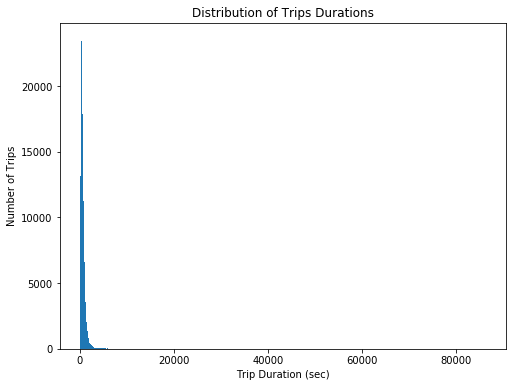

In [143]:
bins = np.arange(ride["duration_sec"].min(),ride["duration_sec"].max()+10, 10)
plt.figure(figsize=(8,6))
plt.hist(data = ride, x = 'duration_sec', bins = bins)
plt.xlabel("Trip Duration (sec)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trips Durations");

In [144]:
# select outliers, using criteria eyeballed from the plot
#outliers_duration = (ride["duration_sec"]>= 8000)
#print(outliers_duration.sum())
#print(ride.loc[outliers_duration,:].head(3))

In [145]:
# get rid of the outliers 
#ride = ride.drop(ride.index[outliers_duration], axis =0)
#ride.shape

In [146]:
# add a column of log duration
#ride["duration_log"] = np.log(ride["duration_sec"])

The distrubtion of the trip durations appear to have a long tail so it is better to use log scale for better illustration.

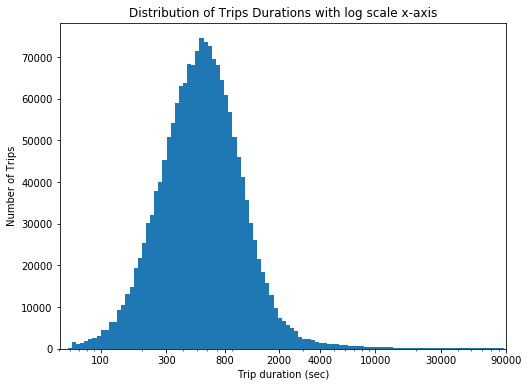

In [147]:
# log scale for trip duration for better illustration of the previous observations
bins = 10**np.arange(1.7, np.log(ride["duration_sec"].max())+0.03, 0.03)
plt.figure(figsize=[8, 6])
plt.hist(data = ride, x = 'duration_sec', bins = bins)
plt.xscale("log")
plt.xticks([100,300, 800, 2000, 4000, 10000, 30000, 90000],[100,300, 800, 2000, 4000, 10000, 30000, 90000])
#plt.xticks([100,200, 500, 1200, 3000, 7000],[100, 200, 500, 1200, 3000, 7000])
plt.xlim(0, 90000)
plt.xlabel("Trip duration (sec)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trips Durations with log scale x-axis");

Duration has a long-tailed distribution, as there are very few trips of vey high duration.After using the log scale for the trip duration (x-axis), the distrubution is almost normal with some skewness to the right. We can clearly see that the peak is around 600 sec and there are very few trips that are less than 100 sec or more than 2000 sec.

Next up, the first predictor variable of interest: user age.

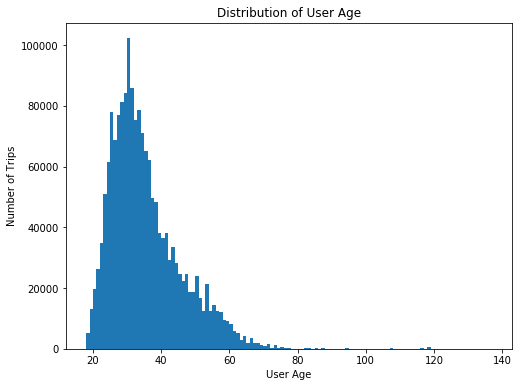

In [148]:
#user_age histogram
bins_birth = np.arange(ride["user_age"].min(), ride["user_age"].max()+1, 1)
plt.figure(figsize=(8,6))
plt.hist(data = ride , x="user_age", bins = bins_birth)
plt.xlabel("User Age")
plt.ylabel("Number of Trips")
plt.title("Distribution of User Age");

We can consider ages older than 100 years as outliers or as  wrong entries.

In [149]:
#delete rows where users are older than 100 years
ride = ride[ride["user_age"] <= 100]

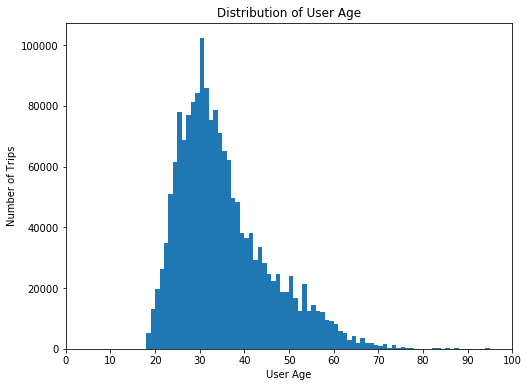

In [150]:
bins_birth = np.arange(ride["user_age"].min(), ride["user_age"].max()+1, 1)
plt.figure(figsize=(8,6))
plt.hist(data = ride , x="user_age", bins = bins_birth)
plt.xlabel("User Age")
plt.ylabel("Number of Trips")
plt.xticks(np.arange(0,100+10,10),np.arange(0,100+10,10))
plt.xlim(0,100)
plt.title("Distribution of User Age");

The age distribution has one peak. This plot shows that most trips are made by users who are around 30 years old. As expected, very few trips are made by users above 60 years old.


Now, Let's move to the user's gender and type.

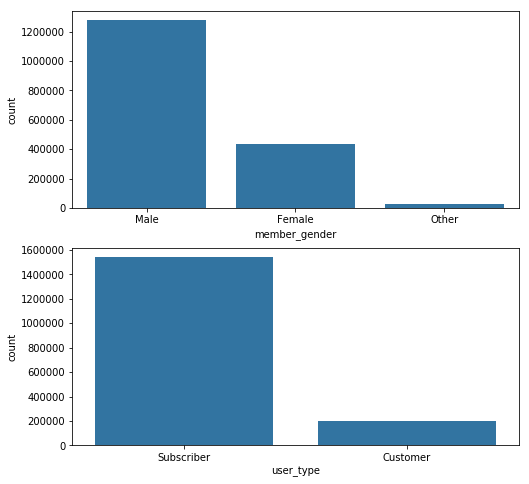

In [151]:
#Gender and user type distributions
default_color = sb.color_palette()[0]
gender_order =["Male","Female","Other"]
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
sb.countplot(data = ride, x='member_gender', color = default_color,  ax = ax[0], order= gender_order)
sb.countplot(data = ride, x='user_type', color = default_color,  ax = ax[1])
#plt.xlabel('Gender')
#plt.ylabel('Number of Users')
plt.show()

For gender, most users for Ford bike ride service are male users. For user type, most users are subscribers.

Now, we consider the start hour and start day of the rides.

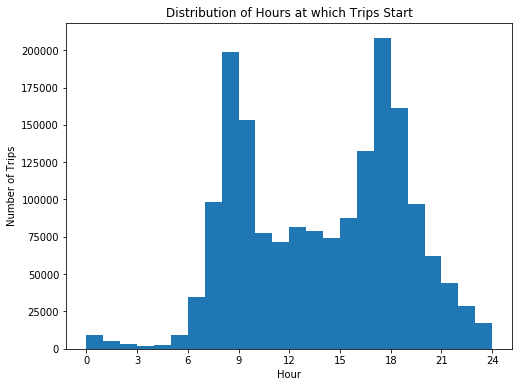

In [152]:
# hour of the start time of trips distribution
bins = np.arange(0,25,1)
plt.figure(figsize=(8,6))
plt.hist(data = ride, x = 'start_hour', bins = bins)
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.xticks([0,3,6,9,12,15,18,21,24],[0,3,6,9,12,15,18,21,24])
#plt.xticks(bins,bins)
plt.title("Distribution of Hours at which Trips Start");

It is interseting to see that the distribution is bimodal (has two peaks). One peak is from 8am to 9am, while the other peak of heavy bike rides traffic is the between 5pm and 6pm. It is also clear that the traffic is very low from midnight until 5 or 6am.

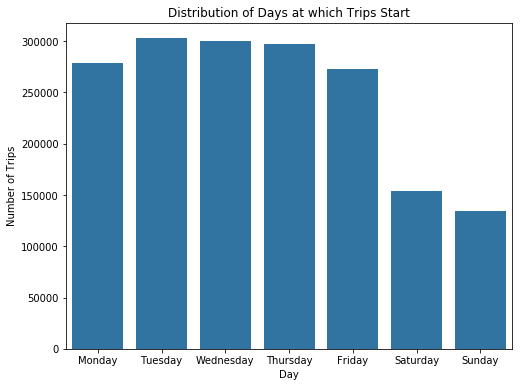

In [153]:
#day of the start time of trips distribution
plt.figure(figsize=(8,6))
sb.countplot(data = ride, x='start_day', color = default_color)
plt.xlabel("Day")
plt.ylabel("Number of Trips")
plt.title("Distribution of Days at which Trips Start");

This plot shows that number of bike rides in weekend (Saturday and Sunday) are significantly less than those in weekdays.

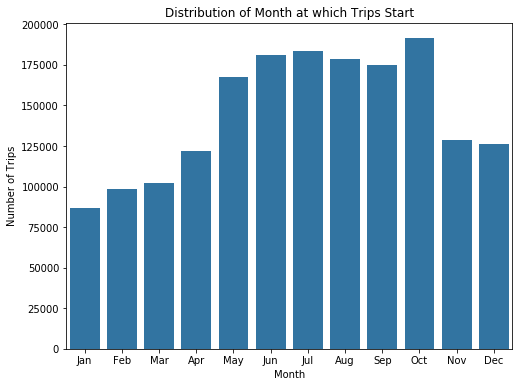

In [154]:
#day of the start month of trips distribution
plt.figure(figsize=(8,6))
sb.countplot(data = ride, x='start_month', color = default_color)
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Distribution of Month at which Trips Start");

There are more rides in warm months (May- Oct) compared to cold ones (Nov-Apr).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data nearly normal, with one peak between 500 sec and 600 sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the user_age variable, a number of outlier points were identified. These points were of very old age. I think it is rational to only consider ages that are less than or equal 100 years old. Therefore, any row with user_age greater than 100 has been deleted.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between the features we concentrate on this dataset.

In [155]:
numeric_vars = ['duration_sec','start_hour', 'user_age']
categoric_vars = ["user_type", "member_gender", "start_day",  "start_month"]

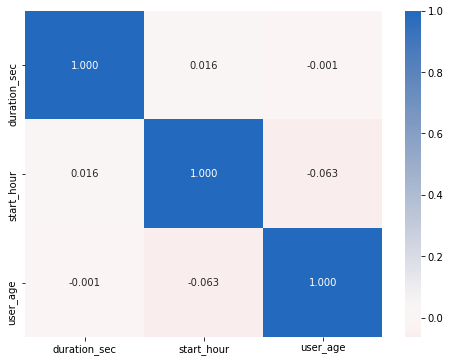

In [156]:
# correlation plot
plt.figure(figsize = [8, 6])
sb.heatmap(ride[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [157]:
# plot matrix: sample 500 trips so that plots are clearer and they render faster
#samples = np.random.choice(ride.shape[0], size = 500, replace = False)
#ride_samp = ride.loc[samples,:]

#g = sb.PairGrid(data = ride_samp, vars = numeric_vars)
#g.map_diag(plt.hist, bins = 20)
#g.map_offdiag(plt.scatter);

There is no clear strong relationships between the numeric variables.

### How trip duration and user_age are related to one another 

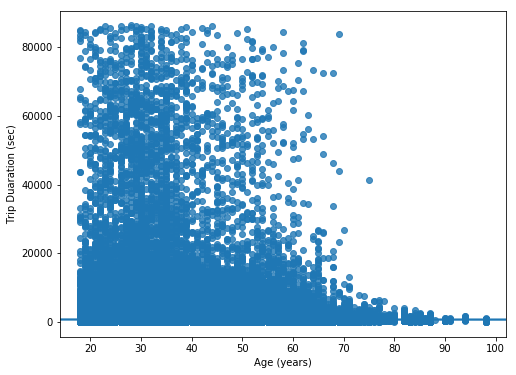

In [158]:
# scatter plot of duration vs. age 
plt.figure(figsize=(8,6))
#plt.scatter(ride["user_age"], ride['duration_sec'], alpha = 1/10 )
sb.regplot(data = ride, x='user_age', y="duration_sec")
#plt.yscale("log")
plt.xlabel('Age (years)')
plt.ylabel('Trip Duaration (sec)')
#plt.yticks([100,300, 800, 2000, 4000, 10000, 30000, 90000],[100,300, 800, 2000, 4000, 10000, 30000, 90000])
plt.show()

In [159]:
#bins_y = np.arange(200, 90000, 1000)
#bins_x = np.arange(0, 100+10, 10)
#plt.hist2d(ride["user_age"], ride['duration_sec'],bins = [bins_x, bins_y])
#plt.xlabel("Age (years)")
#plt.ylabel("Trip Duration (sec)")
#plt.colorbar();

The plot shows that most long trips are made by young users (between 20 and 40 years old). Less long trips are made by users between 40 and 70 years old. Very few long trips are made by users older than 70 years

### How trip duration is affected by the user's gender

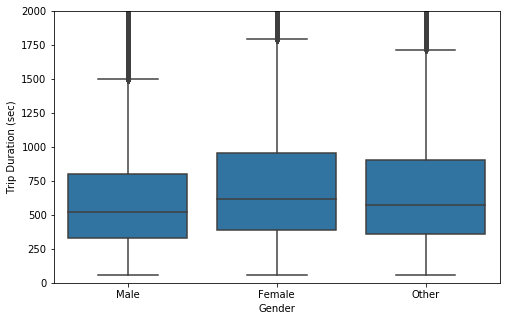

In [160]:
plt.figure(figsize = [8, 5])
sb.boxplot(data = ride, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.xlabel('Gender')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 2000])
plt.show()

Although we saw before in the univariante exploration that the male users are more, this plot here shows that female users make longer bike rides on average.

### How trip duration is affected by user type

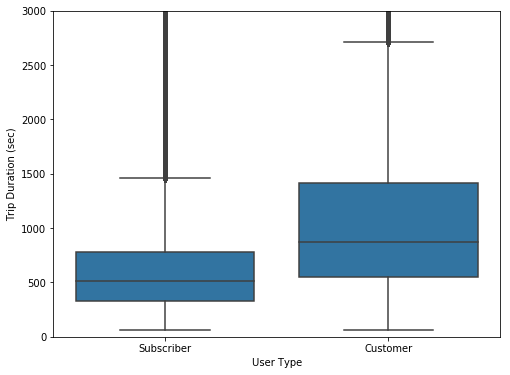

In [161]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = ride, x = 'user_type', y = 'duration_sec', color = default_color)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 3000]);



Although we saw previously that subscribers are significantly more than customers, we can clearly see here that higher percentage of customers are taking longer trips than subscribers.


### How trip duration is affected by the day at which the ride starts

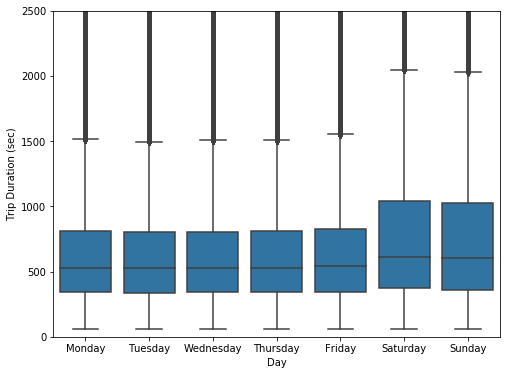

In [162]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = ride, x = 'start_day', y = 'duration_sec', color = default_color)
plt.xlabel('Day')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 2500]);

The figure shows that the rides on the weekends are on average longer than those made during the weekdays.

### How trip duration is affected by the month

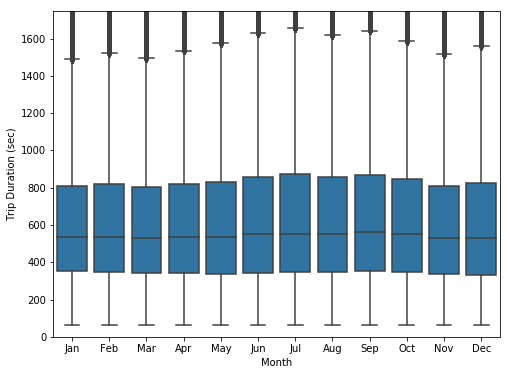

In [163]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = ride, x = 'start_month', y = 'duration_sec', color = default_color)
plt.xlabel('Month')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 1750]);

This show that trips tend to be a bit longer on average in warm months than in cold months.

### Relationship between user age and the categorical features

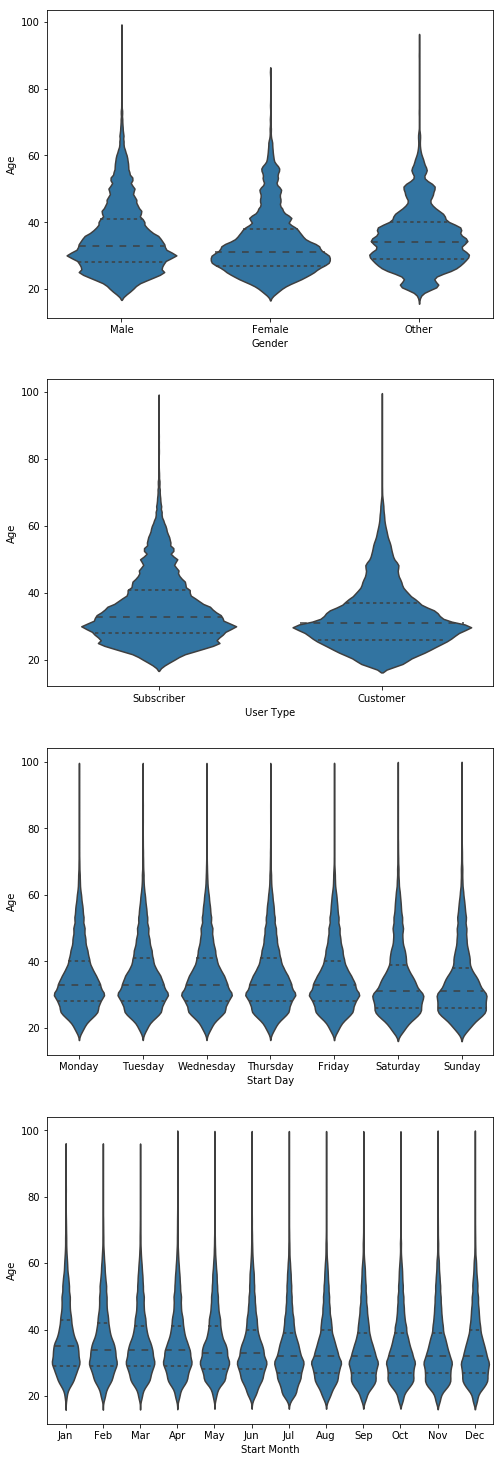

In [164]:
plt.figure(figsize = [8, 26])
ax = plt.subplot(4, 1, 1)
sb.violinplot(data = ride, x = 'member_gender', y = 'user_age', color = default_color, inner="quartile")
plt.xlabel('Gender')
plt.ylabel('Age')

ax = plt.subplot(4, 1, 2)
sb.violinplot(data = ride, x = 'user_type', y = 'user_age', color = default_color, inner="quartile")
plt.xlabel('User Type')
plt.ylabel('Age')

ax = plt.subplot(4, 1, 3)
sb.violinplot(data = ride, x = 'start_day', y = 'user_age', color = default_color, inner="quartile")
plt.xlabel('Start Day')
plt.ylabel('Age')

ax = plt.subplot(4, 1, 4)
sb.violinplot(data = ride, x = 'start_month', y = 'user_age', color = default_color,  inner="quartile")
plt.xlabel('Start Month')
plt.ylabel('Age');

The plots show that percentage of younger females is higher than the percentage of younger males and others. The subscribers appear to be on average older than the customers. Finally, the age of bike riders doesn't appear to change with the day or the month at which the ride starts. 

In [165]:
#plt.figure(figsize = [13, 20])

## subplot 1: day vs. month
#ax = plt.subplot(4, 1, 1)
#sb.countplot(data = ride, x = 'start_month', hue = 'start_day', palette = 'Greens')
#ax.legend(title = "Day",loc = 2, ncol = 2)

## subplot 2: gender vs. user_type
#ax = plt.subplot(4, 1, 2)
#sb.countplot(data = ride, x = 'user_type', hue = 'member_gender', palette = 'Blues')
#ax.legend(title ="Gender")
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

## subplot 3: gender vs. day
#ax = plt.subplot(4, 1, 3)
#sb.countplot(data = ride, x = 'start_day', hue = 'member_gender', palette = 'Blues')
#ax.legend(title ="Gender")
#ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping


## subplot 3: gender vs. month
#ax = plt.subplot(4, 1, 4)
#sb.countplot(data = ride, x = 'start_month', hue = 'member_gender', palette = 'Blues')
#ax.legend(title ="Gender");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is an interesting relationship between the duration of bike rides and the day and month at which the trips take palce. Despite the fact that there are more rides (trips) during the weekdays compared to the weekends, the trips that take place on the weekends are longer. For the month at which the rides take place, there are more rides and longer rides in warm months (May-Oct) than colder months (Nov-Apr).

>The data analysis show that there are more male riders, however, female riders make longer bike rides on average.Similarly, subscribers are significantly more than customers, however, higher percentage of customers are taking longer trips than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are no strong or clear relationships between the numeric features (duration_sec, user_age, start_hour).

>Female bike riders on average are younger than males and others. Moreover, the subscribers appear to be on average older than the customers. However, the age of bike riders doesn't appear to change with the day or the month at which the ride starts.

## Multivariate Exploration


### How User Type affects the Relatioship between Trip Duration and User Gender

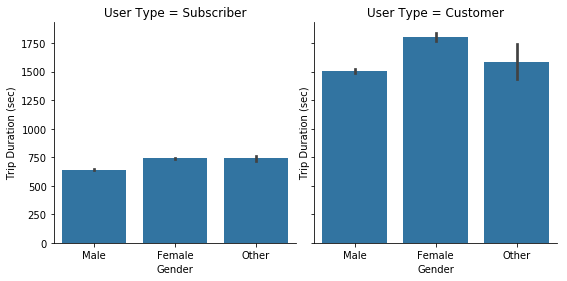

In [166]:

g = sb.FacetGrid(data = ride, col = 'user_type', size = 4)
g.map(sb.barplot, 'member_gender', 'duration_sec')
axes = g.axes.flatten()
axes[0].set_title("User Type = Subscriber")
axes[1].set_title("User Type = Customer")
for ax in g.axes.flat:
    ax.set_xlabel("Gender")
    ax.set_ylabel("Trip Duration (sec)");

Male users have the least average duration of rides (shorter rides on average) in both subscriber and customer types. For subscriber users, both female and other users have almost the same average duration. On the other hand, for the customer users, females have considerably higher average trip duration than other and male users.

### How User Type affects the Relatioship between User Age and User Gender

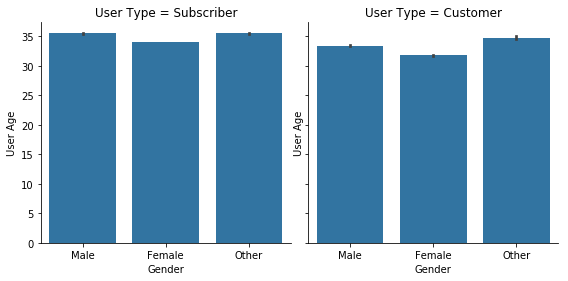

In [167]:
g = sb.FacetGrid(data = ride, col = 'user_type', size = 4)
g= g.map(sb.barplot, 'member_gender', 'user_age')
axes = g.axes.flatten()
axes[0].set_title("User Type = Subscriber")
axes[1].set_title("User Type = Customer")
for ax in g.axes.flat:
    ax.set_xlabel("Gender")
    ax.set_ylabel("User Age")
#g.axes[0,0].set_xlabel('Gender')
#g.axes[0,1].set_xlabel('Gender')


Male Subscriber users are on average older than female subscriber users, and almost the same average age as other. In case of customer users, the same trends between males and females applies, however, the the average age of other users is higher than that of both the males and females.

### How User Gender affects the Relatioship between Trip Duration and User Age

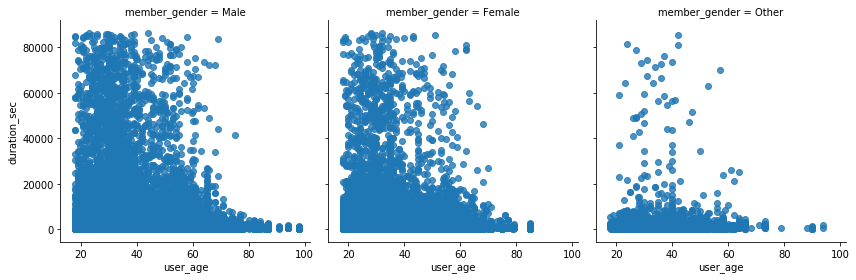

In [168]:
g = sb.FacetGrid(data = ride, col = 'member_gender', size = 4)
g= g.map(sb.regplot, 'user_age', 'duration_sec', fit_reg= False ,x_jitter= 0.04)

The trend between trip duration and user age does not appear to change with different genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Male users have the least average duration of rides (shorter rides on average) in both subscriber and customer types. For subscriber users, both female and other users have almost the same average duration. On the other hand, for the customer users, females have considerably higher average trip duration than other and male users.

>Male Subscriber users are on average older than female subscriber users, and almost the same average age as other. In case of customer users, the same trends between males and females applies, however, the the average age of other users is higher than that of both the males and females.


### Were there any interesting or surprising interactions between features?

> There are no new interesting interactions between features were discovered.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!